In [ ]:
pip install xgboost

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the data from CSV
data = pd.read_csv('./drive/MyDrive/aist4010_project/form_records_cleaned.csv', index_col=0)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# Drop any irrelevant columns
data = data.drop(['Race_Index', 'Date'], axis=1)

# Perform normalization on numerical features
numerical_cols_minmax = ['Distance', 'Draw']
scaler_minmax = MinMaxScaler()
data[numerical_cols_minmax] = scaler_minmax.fit_transform(data[numerical_cols_minmax])

# Perform normalization on numerical features using StandardScaler
numerical_cols_norm = ['Rating', 'Win_Odds', 'Actual_Weight', 'Declared_Horse_Weight']
scaler_norm = StandardScaler()
data[numerical_cols_norm] = scaler_norm.fit_transform(data[numerical_cols_norm])

# Perform one-hot encoding on categorical variables
categorical_cols = ['Going', 'Race_Class','Track', 'Course']
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_cols = pd.DataFrame(encoder.fit_transform(data[categorical_cols]))

# Perform normalization onFinish_Time_ms using StandardScaler
finish_time_cols_norm = ['Finish_Time_ms']
finish_time_norm = StandardScaler()
data[finish_time_cols_norm] = finish_time_norm.fit_transform(data[finish_time_cols_norm])

data = pd.concat([data.drop(categorical_cols, axis=1), encoded_cols], axis=1)

data = data.drop(['Place', 'RC'], axis=1)

data = data.dropna()


X = data.drop('Finish_Time_ms', axis=1).to_numpy()
y = (data['Finish_Time_ms']).to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

[0]	validation_0-rmse:0.90156	validation_1-rmse:0.89908
[1]	validation_0-rmse:0.81230	validation_1-rmse:0.80996
[2]	validation_0-rmse:0.73196	validation_1-rmse:0.72977
[3]	validation_0-rmse:0.65973	validation_1-rmse:0.65766
[4]	validation_0-rmse:0.59475	validation_1-rmse:0.59280
[5]	validation_0-rmse:0.53633	validation_1-rmse:0.53444
[6]	validation_0-rmse:0.48382	validation_1-rmse:0.48193
[7]	validation_0-rmse:0.43662	validation_1-rmse:0.43471
[8]	validation_0-rmse:0.39409	validation_1-rmse:0.39230
[9]	validation_0-rmse:0.35594	validation_1-rmse:0.35419
[10]	validation_0-rmse:0.32175	validation_1-rmse:0.31991
[11]	validation_0-rmse:0.29106	validation_1-rmse:0.28913
[12]	validation_0-rmse:0.26356	validation_1-rmse:0.26151
[13]	validation_0-rmse:0.23893	validation_1-rmse:0.23674
[14]	validation_0-rmse:0.21682	validation_1-rmse:0.21447
[15]	validation_0-rmse:0.19714	validation_1-rmse:0.19457
[16]	validation_0-rmse:0.17957	validation_1-rmse:0.17674
[17]	validation_0-rmse:0.16393	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.13764	validation_1-rmse:0.13400
[20]	validation_0-rmse:0.12674	validation_1-rmse:0.12279
[21]	validation_0-rmse:0.11713	validation_1-rmse:0.11276
[22]	validation_0-rmse:0.10870	validation_1-rmse:0.10393
[23]	validation_0-rmse:0.10096	validation_1-rmse:0.09633
[24]	validation_0-rmse:0.09450	validation_1-rmse:0.08959
[25]	validation_0-rmse:0.08882	validation_1-rmse:0.08375
[26]	validation_0-rmse:0.08397	validation_1-rmse:0.07856
[27]	validation_0-rmse:0.07979	validation_1-rmse:0.07411
[28]	validation_0-rmse:0.07620	validation_1-rmse:0.07024
[29]	validation_0-rmse:0.07306	validation_1-rmse:0.06696
[30]	validation_0-rmse:0.07041	validation_1-rmse:0.06412
[31]	validation_0-rmse:0.06819	validation_1-rmse:0.06163
[32]	validation_0-rmse:0.06618	validation_1-rmse:0.05967
[33]	validation_0-rmse:0.06459	validation_1-rmse:0.05790
[34]	validation_0-rmse:0.06322	validation_1-rmse:0.05643
[35]	validation_0-rmse:0.06207	validation_1-rmse:0.05518
[36]	validation_0-rmse:0.06110	

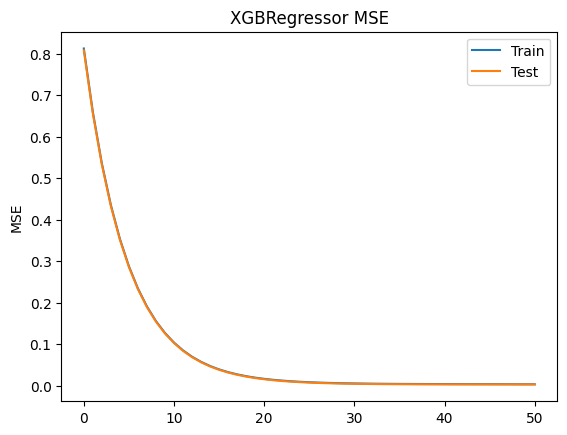

In [ ]:
import xgboost as xgb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


# Initialize the model
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=51, learning_rate=0.1, seed=42)

# Train the regressor with evaluation metrics
xgb_reg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            eval_metric='rmse',
            verbose=True)

y_pred = xgb_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print results
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

print(f"Error in time (ms): {rmse * np.sqrt(finish_time_norm.var_.item())}")

# plot
epochs = len(xgb_reg.evals_result_['validation_0']['rmse'])
x_axis = range(0, epochs)
fig, ax = plt.subplots()
ax.plot(x_axis, np.array(xgb_reg.evals_result_['validation_0']['rmse']) ** 2, label='Train')
ax.plot(x_axis, np.array(xgb_reg.evals_result_['validation_1']['rmse']) ** 2, label='Test')
ax.legend()
plt.ylabel('MSE')
plt.title('XGBRegressor MSE')
plt.show()